In [71]:
import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split




'''
pd.set_option('display.max_rows', None)

Permite que o Pandas mostre todas as linhas de um DataFrame, sem truncar ou resumir os dados.
É útil se estiver visualizando um DataFrame grande e quiser ver todas as linhas (em vez de apenas as primeiras 
ou últimas), isso evita que o Pandas mostre apenas uma parte dele com "..." no meio.
'''
pd.set_option('display.max_rows', None) 



'''
pd.set_option('display.max_columns', None)

Permite que o Pandas exiba todas as todas as colunas de um DataFrame, sem truncar ou resumir os dados.
É útil normalmente, se um DataFrame tiver muitas colunas, o Pandas mostrará apenas algumas e substituirá o restante 
por "..." para economizar espaço. Isso garante que se possa ver todas as colunas de uma vez.
'''
pd.set_option('display.max_columns', None)





'''
pd.set_option('display.max_colwidth', None)

Permite que o Pandas mostre todo o conteúdo das células, independentemente do comprimento do texto.
Útil para visualização de colunas que contêm texto longo ou listas, que normalmente seriam cortadas para caber no layout padrão.
'''
pd.set_option('display.max_colwidth', None)




'''
np.set_printoptions(threshold=np.inf)

Permite que o NumPy exiba todos os elementos de um array, sem limitar o número de elementos mostrados.
Útil quando se imprime arrays grandes do NumPy, ele normalmente resume os elementos usando "..." no meio. 
Esta configuração força a exibição de todos os elementos, o que é útil para depuração ou análise detalhada.
'''
np.set_printoptions(threshold=np.inf)



'''
Se nada disto funcionar:

from IPython.display import display
display(df)

ai ele mostrará tudo
'''
from IPython.display import display

In [72]:
df_churn_train = pd.read_csv('churn_train.csv')

In [73]:
print(f"Total de linhas: {df_churn_train.shape[0]}")
print(f"Total de colunas: {df_churn_train.shape[1]}")

Total de linhas: 583861
Total de colunas: 6


In [74]:
df_churn_train.head(5)

,ID,target,MONTANTE,CATEGORIA,DESCRICAO CATEGORIA,DATA
0,991,0,-0.34,24,Taxas e Impostos,2022-04-25
1,991,0,-0.01,24,Taxas e Impostos,2022-04-25
2,991,0,-1.42,24,Taxas e Impostos,2022-04-25
3,991,0,-0.06,24,Taxas e Impostos,2022-04-25
4,991,0,-0.51,24,Taxas e Impostos,2022-04-25


In [75]:
duplicadas = df_churn_train[df_churn_train.duplicated()]

# Mostra quantas linhas duplicadas existem
print(f"Total de linhas duplicadas: {len(duplicadas)}")

'''
Vamos supor que não existem linhas duplicadas
'''

duplicadas = df_churn_train[df_churn_train.duplicated(keep=False)]
#display(duplicadas[0:50])

Total de linhas duplicadas: 30731


In [76]:
# Exploração dos dados: Contar categorias únicas
num_DESCRICAO_CATEGORIA = df_churn_train['DESCRICAO CATEGORIA'].nunique()
num_CATEGORIA = df_churn_train['CATEGORIA'].nunique()
print(f"Número total de elementos diferentes únicas em 'DESCRICAO CATEGORIA': {num_DESCRICAO_CATEGORIA}")
print(f"Número total de elementos diferentes únicas em 'CATEGORIA': {num_CATEGORIA}")

'''
A cada DESCRICAO CATEGORIA (string) corresponde uma CATEGORIA (int)

criar uma associação direta entre cada valor de CATEGORIA (número) e sua correspondente DESCRICAO CATEGORIA (string) 
extraindo as linhas únicas que possuem ambos os valores. Assim, você garante que não haja discrepância na enumeração.
'''
# Pegar todas as categorias únicas
# Seleciona as colunas de interesse e remove duplicatas, garantindo que cada par seja único
categorias_mapping = df_churn_train[['CATEGORIA', 'DESCRICAO CATEGORIA']].drop_duplicates()

# Ordena pelo valor da coluna CATEGORIA (opcional, para facilitar a visualização)
categorias_mapping = categorias_mapping.sort_values('CATEGORIA')

# Enumerar as categorias
# Exibe a associação
print("Associação entre CATEGORIA e DESCRICAO CATEGORIA:")
for idx, row in categorias_mapping.iterrows():
    print(f"{row['CATEGORIA']}: {row['DESCRICAO CATEGORIA']}")

Número total de elementos diferentes únicas em 'DESCRICAO CATEGORIA': 27
Número total de elementos diferentes únicas em 'CATEGORIA': 27
Associação entre CATEGORIA e DESCRICAO CATEGORIA:
1: Empréstimos e Rendas
2: Telecomunicações
3: Água, luz e gás
4: Casa
5: Seguros
6: Animais de estimação
7: Combustível
8: Carro e Transportes
9: Supermercado
10: Restaurantes e Bares
11: Cafés e Pastelarias
12: Vestuário e Calçado
13: Compras e Serviços
14: Tecnologia
15: Subscrições
16: Hobbies
17: Lazer e Viagens
18: Saúde e Bem estar
19: Cabeleireiro e Barbeiro
20: Educação
21: Ordenado e Subsídios
22: Outros Rendimentos
23: Investimentos e Poupanças
24: Taxas e Impostos
25: Diversos
26: Levantamentos
27: Não categorizadas


In [77]:
'''
DATA: object — Pandas interpretou essa coluna como texto (string), não como uma data. Temos de passar o type standart
do Pandas.

Non-Null Count: Todas as colunas têm 583.861 valores não nulos. Isso indica que não há valores ausentes.
'''
# Primeiro, certificar-se de que a coluna de data está no formato datetime
df_churn_train['DATA'] = pd.to_datetime(df_churn_train['DATA'])

print(f"Dia máximo {df_churn_train['DATA'].max()}")
print(f"Dia minimo {df_churn_train['DATA'].min()}")

# Exploração dos dados: Contar DATA (dias)
num_DATA = df_churn_train['DATA'].nunique()
print(f"Número total de dias diferentes únicos em 'DATA': {num_DATA}")

# Pegar todas as categorias únicas
dias = df_churn_train['DATA'].unique()
dias = np.sort(dias)  # retorna um array ordenado

'''
# Enumerar as categorias
print("Dias em DATA enumeradas:")
for idx, dia in enumerate(dias):
    print(f"{idx}: {dia}")
'''

for idx, dia in enumerate(dias):
    # Converte o numpy.datetime64 para um objeto datetime do pandas e formata a string
    dia_formatado = pd.to_datetime(dia).strftime('%Y-%m-%d')
    print(f"{idx}: {dia_formatado}")

'''
Temos um total de 120 dias (4 meses)

Janeiro (mes 1) = 31
Fevereiro (mes 2) = 28
Março (mes 3) = 31
Abril (mes 4) = 30
'''

Dia máximo 2022-04-30 00:00:00
Dia minimo 2022-01-01 00:00:00
Número total de dias diferentes únicos em 'DATA': 120
0: 2022-01-01
1: 2022-01-02
2: 2022-01-03
3: 2022-01-04
4: 2022-01-05
5: 2022-01-06
6: 2022-01-07
7: 2022-01-08
8: 2022-01-09
9: 2022-01-10
10: 2022-01-11
11: 2022-01-12
12: 2022-01-13
13: 2022-01-14
14: 2022-01-15
15: 2022-01-16
16: 2022-01-17
17: 2022-01-18
18: 2022-01-19
19: 2022-01-20
20: 2022-01-21
21: 2022-01-22
22: 2022-01-23
23: 2022-01-24
24: 2022-01-25
25: 2022-01-26
26: 2022-01-27
27: 2022-01-28
28: 2022-01-29
29: 2022-01-30
30: 2022-01-31
31: 2022-02-01
32: 2022-02-02
33: 2022-02-03
34: 2022-02-04
35: 2022-02-05
36: 2022-02-06
37: 2022-02-07
38: 2022-02-08
39: 2022-02-09
40: 2022-02-10
41: 2022-02-11
42: 2022-02-12
43: 2022-02-13
44: 2022-02-14
45: 2022-02-15
46: 2022-02-16
47: 2022-02-17
48: 2022-02-18
49: 2022-02-19
50: 2022-02-20
51: 2022-02-21
52: 2022-02-22
53: 2022-02-23
54: 2022-02-24
55: 2022-02-25
56: 2022-02-26
57: 2022-02-27
58: 2022-02-28
59: 2022-

'\nTemos um total de 120 dias (4 meses)\n\nJaneiro (mes 1) = 31\nFevereiro (mes 2) = 28\nMarço (mes 3) = 31\nAbril (mes 4) = 30\n'

In [78]:
# Sort by Grid_ID and Datetime
'''
Primeiro, ele organiza as linhas com base na coluna 'ID'.
Depois, dentro de cada grupo de mesmo 'ID', ele ordena as linhas em função da coluna 'DATA'.
'''
df_churn_train = df_churn_train.sort_values(by=['ID', 'DATA'])

# Troca a ordem das colunas:
col_order = ['ID', 'DATA','MONTANTE', 'CATEGORIA', 'DESCRICAO CATEGORIA', 'target']
df_churn_train = df_churn_train[col_order]

In [79]:
df_churn_train.head(50)

,ID,DATA,MONTANTE,CATEGORIA,DESCRICAO CATEGORIA,target
468308,1,2022-01-03,-800.00,27,Não categorizadas,0
474891,1,2022-01-03,-5.00,12,Vestuário e Calçado,0
483969,1,2022-01-03,-21.61,5,Seguros,0
489828,1,2022-01-03,-37.98,25,Diversos,0
482460,1,2022-01-04,-336.99,1,Empréstimos e Rendas,0
219567,1,2022-01-05,-34.90,2,Telecomunicações,0
490753,1,2022-01-05,-1.00,24,Taxas e Impostos,0
490754,1,2022-01-05,-0.04,24,Taxas e Impostos,0
490755,1,2022-01-05,-2.60,24,Taxas e Impostos,0
468309,1,2022-01-06,-3.20,27,Não categorizadas,0


In [80]:
print(f"Montante máximo numa transferencia: {df_churn_train['MONTANTE'].max()}")
print(f"Montante minimo numa transferencia: {df_churn_train['MONTANTE'].min()}")

Montante máximo numa transferencia: 45787203.32
Montante minimo numa transferencia: -44779591.95


In [81]:
# Extrair o dia da semana como uma nova coluna
# (0 = Segunda-feira, 6 = Domingo)
df_churn_train['dia_da_semana'] = df_churn_train['DATA'].dt.dayofweek

# Criar uma tabela pivô para contar o número de transações por tipo de transação e dia da semana
matriz_transacoes = pd.pivot_table(
    df_churn_train,
    index='DESCRICAO CATEGORIA',  # Cada linha será um tipo de transação
    columns='dia_da_semana',  # Cada coluna será um tipo de dia
    values='ID',  # Pode-se usar o ID do cliente para contagem
    aggfunc='count',  # Contar o número de transações
    fill_value=0  # Preencher valores ausentes com 0
)

# Exibir a matriz
#display(matriz_transacoes)

In [82]:
df_churn_train['DATA'] = pd.to_datetime(df_churn_train['DATA'], format="%Y-%m-%d", errors='coerce')

# Sort by Grid_ID and Datetime
df_churn_train = df_churn_train.sort_values(by=['ID', 'DATA'])

col_order = ['ID', 'DATA','MONTANTE', 'CATEGORIA', 'DESCRICAO CATEGORIA', 'target']
df_churn_train = df_churn_train[col_order]


In [83]:
df_churn_train.head(50)

,ID,DATA,MONTANTE,CATEGORIA,DESCRICAO CATEGORIA,target
468308,1,2022-01-03,-800.00,27,Não categorizadas,0
474891,1,2022-01-03,-5.00,12,Vestuário e Calçado,0
483969,1,2022-01-03,-21.61,5,Seguros,0
489828,1,2022-01-03,-37.98,25,Diversos,0
482460,1,2022-01-04,-336.99,1,Empréstimos e Rendas,0
219567,1,2022-01-05,-34.90,2,Telecomunicações,0
490753,1,2022-01-05,-1.00,24,Taxas e Impostos,0
490754,1,2022-01-05,-0.04,24,Taxas e Impostos,0
490755,1,2022-01-05,-2.60,24,Taxas e Impostos,0
468309,1,2022-01-06,-3.20,27,Não categorizadas,0


In [84]:
print(df_churn_train['DATA'].max())
print(df_churn_train['DATA'].min())

2022-04-30 00:00:00
2022-01-01 00:00:00


In [85]:
import pandas as pd

# Supondo que a coluna 'DATA' está em formato datetime
# df_churn_train['DATA'] = pd.to_datetime(df_churn_train['DATA'])

# --- Agregar as transações por cliente para obter features gerais ---
df_customer_features = df_churn_train.groupby(['ID', 'target']).agg(
    total_transacoes=('MONTANTE', 'count'),
    std_transaction_amount=("MONTANTE", "std"),
    avg_transaction_amount=("MONTANTE", "mean"),
    total_creditos=('MONTANTE', lambda x: (x > 0).sum()),
    total_debitos=('MONTANTE', lambda x: (x < 0).sum()),
    total_montante=('MONTANTE', 'sum'),
    categoria_frequente=('CATEGORIA', lambda x: x.mode()[0] if not x.mode().empty else None),
    last_transaction_date=("DATA", "max")
).reset_index()

# Calcular dias desde a última transação
df_customer_features["days_since_last_transaction"] = (pd.to_datetime("2022-04-30") - df_customer_features["last_transaction_date"]).dt.days

# Preencher valores NaN na coluna de desvio padrão com 0 (caso haja clientes com apenas uma transação)
df_customer_features["std_transaction_amount"] = df_customer_features["std_transaction_amount"].fillna(0)

# --- Calcular as features por intervalos de tempo ---
ref_date = df_churn_train['DATA'].max()  # Último dia no dataset
days_interval = 15  # Tamanho da janela
num_intervals = 8  # Número de janelas consecutivas

# Loop para gerar e incorporar as features de cada intervalo
for i in range(num_intervals):
    start_date = ref_date - pd.Timedelta(days=(i+1) * days_interval)
    end_date = ref_date - pd.Timedelta(days=i * days_interval)
    
    # Filtrar transações no intervalo atual
    df_interval = df_churn_train[(df_churn_train['DATA'] > start_date) & (df_churn_train['DATA'] <= end_date)]
    
    # DataFrame para armazenar as features deste intervalo
    features_current = pd.DataFrame()

    for trans_type in range(27):  # Iterar sobre os tipos de transação (0 a 26)
        df_type = df_interval[df_interval['CATEGORIA'] == trans_type]
        
        # Agrupar por ID e calcular as métricas desejadas
        aggregated = df_type.groupby('ID')['MONTANTE'].agg(
            count="count",
            sum="sum",
            min="min",
            max="max",
            std="std",
            mean="mean"
        ).reset_index()

        # Renomear as colunas para refletir o intervalo e o tipo de transação
        aggregated = aggregated.rename(columns={
            'count': f"interval_{i+1}_count_type_{trans_type}",
            'sum':   f"interval_{i+1}_sum_type_{trans_type}",
            'min':   f"interval_{i+1}_min_type_{trans_type}",
            'max':   f"interval_{i+1}_max_type_{trans_type}",
            'std':   f"interval_{i+1}_std_type_{trans_type}",
            'mean':  f"interval_{i+1}_avg_type_{trans_type}"
        })

        # Definir 'ID' como índice para facilitar a concatenação
        aggregated = aggregated.set_index('ID')
        
        # Concatenar as métricas para esse tipo
        features_current = pd.concat([features_current, aggregated], axis=1)
    
    # Preencher valores NaN com 0 para IDs sem transações naquele intervalo
    features_current.fillna(0, inplace=True)
    features_current.reset_index(inplace=True)
    
    # Incorporar as features deste intervalo ao DataFrame principal
    df_customer_features = df_customer_features.merge(features_current, on='ID', how='left')
    df_customer_features.fillna(0, inplace=True)

# Exibir o DataFrame final
#print(df_customer_features.head())


In [86]:
print(f"Total de linhas: {df_customer_features.shape[0]}")
print(f"Total de colunas: {df_customer_features.shape[1]}")

Total de linhas: 1561
Total de colunas: 1307


In [87]:
'''
Os dados estao desbalançados e veremos que isso será um problema! Afetará a nossa previsão.
E isso terá de ser levado em conta.
'''
contagem = df_customer_features['target'].value_counts()
print(contagem)

target
0    951
1    610
Name: count, dtype: int64


In [88]:
df_customer_features.head(5)

,ID,target,total_transacoes,std_transaction_amount,avg_transaction_amount,total_creditos,total_debitos,total_montante,categoria_frequente,last_transaction_date,days_since_last_transaction,interval_1_count_type_0,interval_1_sum_type_0,interval_1_min_type_0,interval_1_max_type_0,interval_1_std_type_0,interval_1_avg_type_0,interval_1_count_type_1,interval_1_sum_type_1,interval_1_min_type_1,interval_1_max_type_1,interval_1_std_type_1,interval_1_avg_type_1,interval_1_count_type_2,interval_1_sum_type_2,interval_1_min_type_2,interval_1_max_type_2,interval_1_std_type_2,interval_1_avg_type_2,interval_1_count_type_3,interval_1_sum_type_3,interval_1_min_type_3,interval_1_max_type_3,interval_1_std_type_3,interval_1_avg_type_3,interval_1_count_type_4,interval_1_sum_type_4,interval_1_min_type_4,interval_1_max_type_4,interval_1_std_type_4,interval_1_avg_type_4,interval_1_count_type_5,interval_1_sum_type_5,interval_1_min_type_5,interval_1_max_type_5,interval_1_std_type_5,interval_1_avg_type_5,interval_1_count_type_6,interval_1_sum_type_6,interval_1_min_type_6,interval_1_max_type_6,interval_1_std_type_6,interval_1_avg_type_6,interval_1_count_type_7,interval_1_sum_type_7,interval_1_min_type_7,interval_1_max_type_7,interval_1_std_type_7,interval_1_avg_type_7,interval_1_count_type_8,interval_1_sum_type_8,interval_1_min_type_8,interval_1_max_type_8,interval_1_std_type_8,interval_1_avg_type_8,interval_1_count_type_9,interval_1_sum_type_9,interval_1_min_type_9,interval_1_max_type_9,interval_1_std_type_9,interval_1_avg_type_9,interval_1_count_type_10,interval_1_sum_type_10,interval_1_min_type_10,interval_1_max_type_10,interval_1_std_type_10,interval_1_avg_type_10,interval_1_count_type_11,interval_1_sum_type_11,interval_1_min_type_11,interval_1_max_type_11,interval_1_std_type_11,interval_1_avg_type_11,interval_1_count_type_12,interval_1_sum_type_12,interval_1_min_type_12,interval_1_max_type_12,interval_1_std_type_12,interval_1_avg_type_12,interval_1_count_type_13,interval_1_sum_type_13,interval_1_min_type_13,interval_1_max_type_13,interval_1_std_type_13,interval_1_avg_type_13,interval_1_count_type_14,interval_1_sum_type_14,interval_1_min_type_14,interval_1_max_type_14,interval_1_std_type_14,interval_1_avg_type_14,interval_1_count_type_15,interval_1_sum_type_15,interval_1_min_type_15,interval_1_max_type_15,interval_1_std_type_15,interval_1_avg_type_15,interval_1_count_type_16,interval_1_sum_type_16,interval_1_min_type_16,interval_1_max_type_16,interval_1_std_type_16,interval_1_avg_type_16,interval_1_count_type_17,interval_1_sum_type_17,interval_1_min_type_17,interval_1_max_type_17,interval_1_std_type_17,interval_1_avg_type_17,interval_1_count_type_18,interval_1_sum_type_18,interval_1_min_type_18,interval_1_max_type_18,interval_1_std_type_18,interval_1_avg_type_18,interval_1_count_type_19,interval_1_sum_type_19,interval_1_min_type_19,interval_1_max_type_19,interval_1_std_type_19,interval_1_avg_type_19,interval_1_count_type_20,interval_1_sum_type_20,interval_1_min_type_20,interval_1_max_type_20,interval_1_std_type_20,interval_1_avg_type_20,interval_1_count_type_21,interval_1_sum_type_21,interval_1_min_type_21,interval_1_max_type_21,interval_1_std_type_21,interval_1_avg_type_21,interval_1_count_type_22,interval_1_sum_type_22,interval_1_min_type_22,interval_1_max_type_22,interval_1_std_type_22,interval_1_avg_type_22,interval_1_count_type_23,interval_1_sum_type_23,interval_1_min_type_23,interval_1_max_type_23,interval_1_std_type_23,interval_1_avg_type_23,interval_1_count_type_24,interval_1_sum_type_24,interval_1_min_type_24,interval_1_max_type_24,interval_1_std_type_24,interval_1_avg_type_24,interval_1_count_type_25,interval_1_sum_type_25,interval_1_min_type_25,interval_1_max_type_25,interval_1_std_type_25,interval_1_avg_type_25,interval_1_count_type_26,interval_1_sum_type_26,interval_1_min_type_26,interval_1_max_type_26,interval_1_std_type_26,interval_1_avg_type_26,interval_2_count_type_0,interval_2_sum_type_0,interval_2_min_type_0,interval_2_max_type_0,in

In [89]:
# Separar variáveis independentes e dependentes
X = df_customer_features.drop(columns=["ID", "target", "last_transaction_date"])
y = df_customer_features["target"]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/opt/anaconda3/envs/env_AI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:05:22] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


accuracy: 0.7121535181236673
ROC AUC: 0.7527474653664576
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       292
           1       0.66      0.49      0.56       177

    accuracy                           0.71       469
   macro avg       0.70      0.67      0.67       469
weighted avg       0.71      0.71      0.70       469

Matriz de Confusão:
[[247  45]
 [ 90  87]]


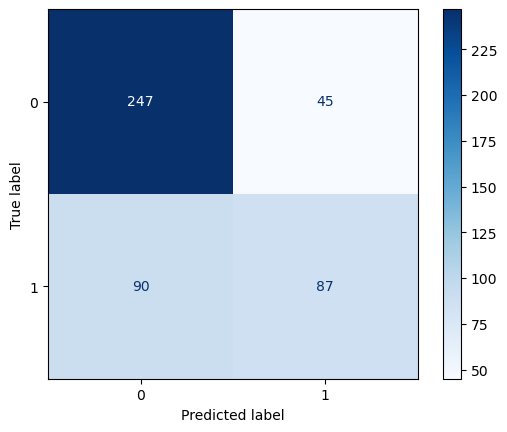

In [90]:
import xgboost as xgb

# Separar variáveis independentes e dependentes
X = df_customer_features.drop(columns=["ID", "target", "last_transaction_date"])
y = df_customer_features["target"]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Treinar o modelo
model.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))




# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

print("Matriz de Confusão:")
print(cm)

accuracy: 0.7164179104477612
ROC AUC: 0.7707607770296416
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       292
           1       0.72      0.41      0.52       177

    accuracy                           0.72       469
   macro avg       0.72      0.66      0.66       469
weighted avg       0.72      0.72      0.69       469

Matriz de Confusão:
[[264  28]
 [105  72]]


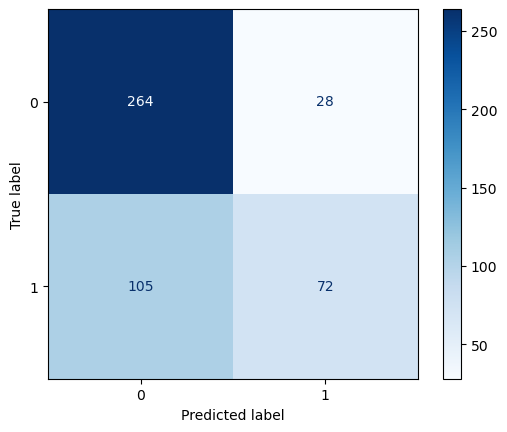

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Separar variáveis independentes e dependentes
X = df_customer_features.drop(columns=["ID", "target", "last_transaction_date"])
y = df_customer_features["target"]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))



# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

print("Matriz de Confusão:")
print(cm)


0:	learn: 0.6309524	total: 45.9ms	remaining: 22.9s
50:	learn: 0.9001832	total: 3.14s	remaining: 27.6s
100:	learn: 0.9899267	total: 6.14s	remaining: 24.3s
150:	learn: 0.9963370	total: 8.83s	remaining: 20.4s
200:	learn: 1.0000000	total: 11.4s	remaining: 17s
250:	learn: 1.0000000	total: 14.2s	remaining: 14.1s
300:	learn: 1.0000000	total: 16.8s	remaining: 11.1s
350:	learn: 1.0000000	total: 19.5s	remaining: 8.28s
400:	learn: 1.0000000	total: 22.2s	remaining: 5.48s
450:	learn: 1.0000000	total: 24.8s	remaining: 2.7s
499:	learn: 1.0000000	total: 27.5s	remaining: 0us
accuracy: 0.7185501066098081
ROC AUC: 0.7707607770296416
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80       292
           1       0.70      0.45      0.55       177

    accuracy                           0.72       469
   macro avg       0.71      0.67      0.67       469
weighted avg       0.71      0.72      0.70       469

Matriz de Confusão:
[[

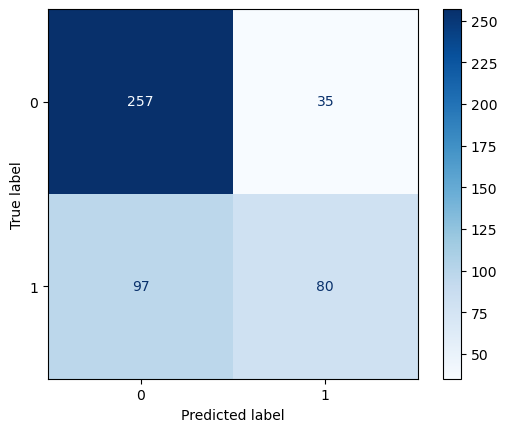

In [92]:



from catboost import CatBoostClassifier

# Separar variáveis independentes e dependentes
X = df_customer_features.drop(columns=["ID", "target", "last_transaction_date"])
y = df_customer_features["target"]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo CatBoost
model = CatBoostClassifier(
    iterations=500,            # Número de iterações (mais iter = melhor ajuste, mas mais lento)
    learning_rate=0.1,          # Taxa de aprendizado
    depth=6,                    # Profundidade da árvore
    eval_metric='Accuracy',     # Métrica de avaliação
    random_seed=42,
    verbose=50,                 # Mostra o progresso a cada 50 iterações
    cat_features=[]             # (opcional) Liste os índices ou nomes das colunas categóricas, se houver
)

# Treinar o modelo
model.fit(X_train, y_train)


# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

print("Matriz de Confusão:")
print(cm)



Epoch 1/50
28/28 [==============================] - 1s 9ms/step - loss: 1068.2460 - accuracy: 0.5304 - val_loss: 446.4123 - val_accuracy: 0.5342
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 493.0294 - accuracy: 0.5888 - val_loss: 448.8635 - val_accuracy: 0.4932
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 1658.7477 - accuracy: 0.6415 - val_loss: 395.9963 - val_accuracy: 0.5342
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 757.7134 - accuracy: 0.6472 - val_loss: 343.0159 - val_accuracy: 0.5662
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 139.2536 - accuracy: 0.6816 - val_loss: 311.3957 - val_accuracy: 0.5297
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 63.9451 - accuracy: 0.6724 - val_loss: 297.8381 - val_accuracy: 0.5388
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 29.6698 - accuracy: 0.6724 - val_loss: 317.3717 - val_accuracy:

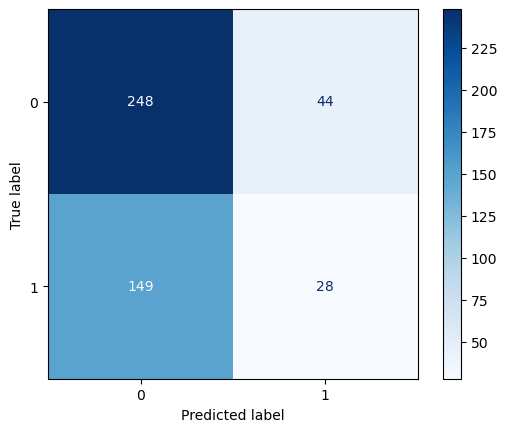

In [93]:
from sklearn.preprocessing import MinMaxScaler

# Separar variáveis independentes e dependentes
X = df_customer_features.drop(columns=["ID", "target", "last_transaction_date"])
y = df_customer_features["target"]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Normalizar os dados (opcional, mas recomendável para redes neurais)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Reshape necessário para LSTM: (amostras, passos de tempo, features)
# Aqui, cada amostra terá apenas 1 passo de tempo
# Converter X_train e X_test para arrays NumPy antes do reshape
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Criar o modelo
model = Sequential()

# Primeira camada LSTM
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Camada opcional de Dropout para evitar overfitting
model.add(Dropout(0.2))

# Camada densa final (saída binária: 0 ou 1)
model.add(Dense(units=1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=50,              # Número de épocas
    batch_size=32,          # Tamanho do batch
    validation_split=0.2,   # Separar parte do treino para validação
    verbose=1               # Mostrar progresso
)


# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.2%}")

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Converter probabilidades em rótulos binários (0 ou 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Exibir algumas previsões
print(y_pred_binary[:10].flatten())



# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Converter para previsões binárias com um limiar de 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular a accuracy com as previsões binárias
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

print(f"accuracy: {accuracy:.2%}")
print("ROC AUC:", roc_auc)

# Exibir relatório detalhado
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_binary))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_binary)

# Exibir a matriz de confusão de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

print("Matriz de Confusão:")
print(cm)
